# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

In [3]:
titan_url = cancer_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv"
titanic_data =  pd.read_csv(titan_url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
titanic_data_new = titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic_data_new.head()
print(titanic_data_new.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [0]:
# df.fillna(df.mean(), inplace=True)

In [0]:
titanic_data_new = titanic_data_new.fillna(titanic_data_new.mean())

In [7]:
titanic_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
print(titanic_data_new.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [8]:
titanic_data_new.shape

(891, 8)

In [0]:
titanic_data_new = titanic_data_new.dropna()

In [9]:
titanic_data_new.shape

(889, 8)

In [10]:
print(titanic_data_new.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [0]:
titanic_data_new = pd.get_dummies(titanic_data_new)

In [12]:
titanic_data_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3edcd61630>,
      dtype=object)

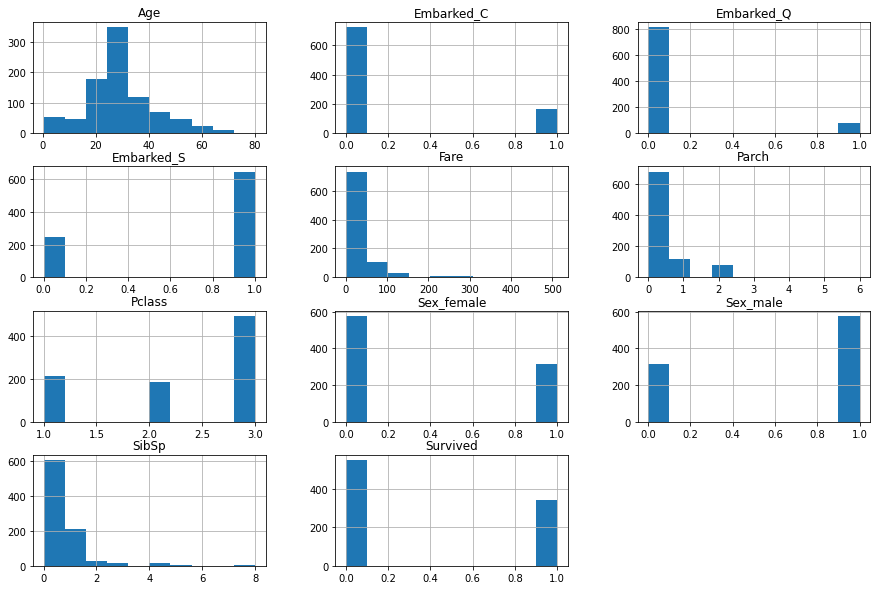

In [13]:
titanic_data_new.hist(figsize=(15,10))

In [0]:
titanic_data_new.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

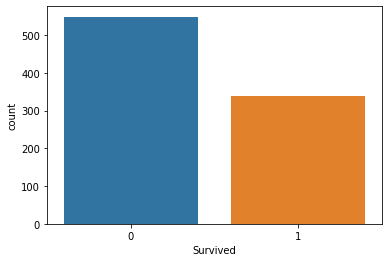

In [0]:
sns.countplot (titanic_data_new.Survived)

In [0]:
X = titanic_data_new.drop(['Survived'], axis=1)
y = titanic_data_new['Survived']
# X.head()

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
model = rfc.fit(X_train, y_train) # print(rfc)
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

In [17]:
train_score = accuracy_score(y_train, train_predictions)
test_score = accuracy_score(y_test, test_predictions)
print(train_score, test_score)

0.8818565400843882 0.848314606741573


In [18]:
print( np.unique( y_test ) )


[0 1]


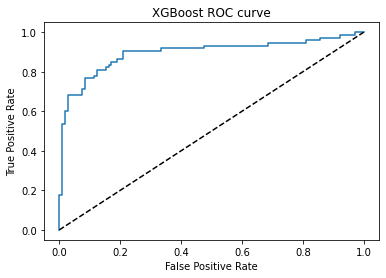

In [0]:
from sklearn.metrics import roc_curve  
probs = model.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

In [20]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(rfc, X_train, y_train, cv=kfold)
print(results)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.88888889 0.87323944 0.78873239 0.8028169  0.85915493 0.88732394
 0.81690141 0.78873239 0.77464789 0.76056338]


In [21]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 82.41% (4.62%)


In [0]:
# importances = model.feature_importances_


# ### Visualize Feature Importance

# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]

# # Rearrange feature names so they match the sorted feature importances
# names = [titanic_data_new.columns[i] for i in indices]

# # Create plot
# plt.figure(figsize=(20,5))

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

In [0]:
# # Create a pd.Series of features importances
# importances_rf = pd.Series(model.feature_importances_, index = X.columns)
# # Sort importances_rf
# sorted_importances_rf = importances_rf.sort_values()
# # Make a horizontal bar plot
# sorted_importances_rf.plot(kind='barh'); 
# plt.show()

In [0]:
cm_gs = confusion_matrix(y_test, test_predictions)
print(cm_gs)
print("="*60)
print(classification_report(y_test, test_predictions))

[[99  6]
 [23 50]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       105
           1       0.89      0.68      0.78        73

    accuracy                           0.84       178
   macro avg       0.85      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178



*XGBboost Model testing*

In [0]:
# Initialising the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=400,learning_rate=0.1, scale_pos_weight=1)
model_xgb = xgb_clf.fit(X_train, y_train)
#all_score(xgb_clf)

In [194]:
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(X_train)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

91.84 %


In [195]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

85.39 %


In [105]:
from collections import Counter 

# count examples in each class
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 1.615


Using gridsearch for improving the accuracy of XGBoost

In [0]:
from sklearn.model_selection import GridSearchCV

# Defining the classifier 
estimator = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42
)
# objective is binary:logistic: logistic regression for binary classification, output probability.
# nthread is the number of parallel threads used to run XGBoost.
# seed is Random number seed. 


# Defining the parameters to be tuned 
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'scale_pos_weight': range(1, 10, 1)
}

# Instantiating the grid search 
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
# n_jobs allows you to specify the number of parallel jobs to run.
# Verbose = True means the next code cell wil print what the machine is doing right now. 

In [189]:
# Fitting the grid search 
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   11.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   21.3s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   37.4s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  4.2min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  5.4min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  6.9min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  8.0min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed:  9.7min
[Parallel(n_jobs=10)]: Done 8640 out of 8640 | elapsed: 10.1min finished


({'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 180,
  'scale_pos_weight': 1},
 0.8673118650896429)

In [0]:
# Printing the arguments of the classifier 
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

Using K-fold to check the overfitiing of the data

In [0]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(xgb_clf, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.875      0.8028169  0.77464789 0.83098592 0.87323944 0.90140845
 0.81690141 0.76056338 0.78873239 0.77464789]
Accuracy: 81.99% (4.64%)


using Voting Classifier 

In [0]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility
SEED = 1

In [0]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
rcfl = RandomForestClassifier(random_state=SEED)
dt = DecisionTreeClassifier(random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('Random forest', rcfl),
('Classification Tree', dt)]

In [0]:
import warnings
warnings.filterwarnings("ignore")
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.837
Random forest : 0.831
Classification Tree : 0.742


In [0]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

Voting classifier:  0.826


In [0]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(vc, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.875      0.83098592 0.78873239 0.74647887 0.87323944 0.85915493
 0.83098592 0.78873239 0.76056338 0.74647887]
Accuracy: 81.00% (4.79%)


Bagging

In [0]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1

In [0]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.831


# Grid search for hyperparameter tuning

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [0]:
# Fitting the grid search 
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 25.7min finished


({'bootstrap': True,
  'max_depth': 80,
  'max_features': 3,
  'min_samples_leaf': 3,
  'min_samples_split': 12,
  'n_estimators': 300},
 0.8297339593114241)

In [0]:
# Printing the arguments of the classifier 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

AdaBoost

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [0]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

In [0]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=100, base_estimator=dt, learning_rate=0.05)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8426966292134831


In [0]:
abc.get_params

In [0]:
# # Defining the parameters to be tuned 
# parameters = {
#     'max_depth': range (1, 4, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]
# }

# # Instantiating the grid search 
# grid_search = GridSearchCV(
#     estimator=abc,
#     param_grid=parameters,
#     scoring = 'roc_auc',
#     n_jobs = 10,
#     cv = 10,
#     verbose=True
# )
# # n_jobs allows you to specify the number of parallel jobs to run.
# # Verbose = True means the next code cell wil print what the machine is doing right now. 

In [0]:
# # Fitting the grid search 
# # xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
# grid_search.fit(X_train, y_train)
# grid_search.best_params_, grid_search.best_score_

In [0]:
# Printing the arguments of the classifier 
grid_search.best_estimator_

In [0]:
kfold = KFold(n_splits=10, random_state=123)
model = AdaBoostClassifier(n_estimators=100, random_state=123)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7307711950970379


In [0]:
kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(vc, X_train, y_train, cv=kfold)
